In [1]:
%pip install scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Carregando dataset
data = pd.read_excel("hoteis_tratados.xlsx")
data.columns = data.columns.str.lower()
data

,data_avaliacao,titulo,comentario_positivo,comentario_negativo,nota,hotel
0,2025-02-17,bom,A localização é perfeita e os funcionários são...,Da área de lazer que é pequena e sem uma vista...,10.0,Atlante_Plaza
1,2025-03-30,Pretenso vir oitras vezes,Atrndimento e conforto,Estacionamento pago,10.0,Atlante_Plaza
2,2025-03-29,Excepcional,"Foi excelente!! Tudo muito bom, os funcionário...",NaN,10.0,Atlante_Plaza
3,2025-03-29,Quero voltar!,"Funcionários bem treinados. Agradecemos, espec...",NaN,9.0,Atlante_Plaza
4,2025-03-27,Incrível,Excelente,NaN,10.0,Atlante_Plaza
...,...,...,...,...,...,...
72439,2024-12-28,Excepcional,NaN,NaN,10.0,Vela_Branca
72440,2024-08-14,Aceitável,NaN,NaN,5.0,Vela_Branca
72441,2024-04-12,Aceitável,NaN,NaN,5.0,Vela_Branca
72442,2024-03-26,Excepcional,NaN,NaN,10.0,Vela_Branca


In [3]:
#preenchendo valores NaN

data['nota'] = data['nota'].fillna("Nao informado")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72444 entries, 0 to 72443
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_avaliacao       72444 non-null  datetime64[ns]
 1   titulo               72444 non-null  object        
 2   comentario_positivo  34665 non-null  object        
 3   comentario_negativo  29024 non-null  object        
 4   nota                 72444 non-null  float64       
 5   hotel                72444 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
data['nota'].unique()


In [ ]:
data['nota'].nunique()


C:\Users\Itamar\AppData\Local\Temp\ipykernel_12996\3791609315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nota_media_hotel, x='nota_media', y='hotel', palette='viridis')


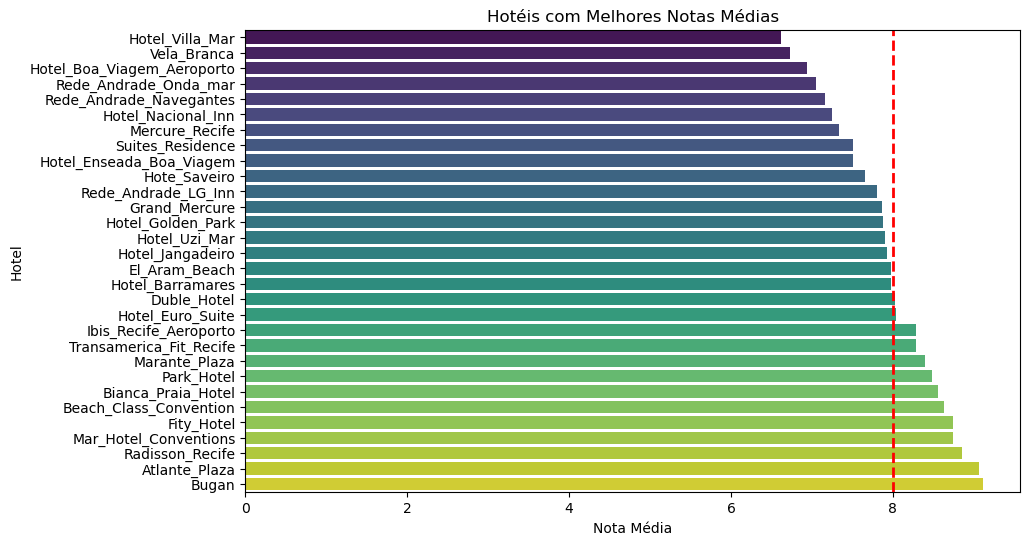

In [10]:
nota_media_hotel = data.groupby('hotel').agg(nota_media=('nota', 'mean')).sort_values(by='nota_media').reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=nota_media_hotel, x='nota_media', y='hotel', palette='viridis')

# Linha vertical vermelha, pontilhada, na posição x = 8
# analise o fato de que a maior parte dos hotéis analisados tirou uma nota média menor que 8

plt.axvline(x=8, color='red', linestyle='--', linewidth=2)

plt.title('Hotéis com Melhores Notas Médias')
plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.show()


# depois filtre os hoteis com nota <8 e tente identificar os termos mais recorrentes nos comentários NEGATIVOS
# depois filtre os hoteis com nota >8 e tente identificar os termos mais recorrentes nos comentários POSITIVOS

C:\Users\Itamar\AppData\Local\Temp\ipykernel_12996\2710048111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comentarios_positivos, x='comentario_positivo', y='hotel', palette='viridis')


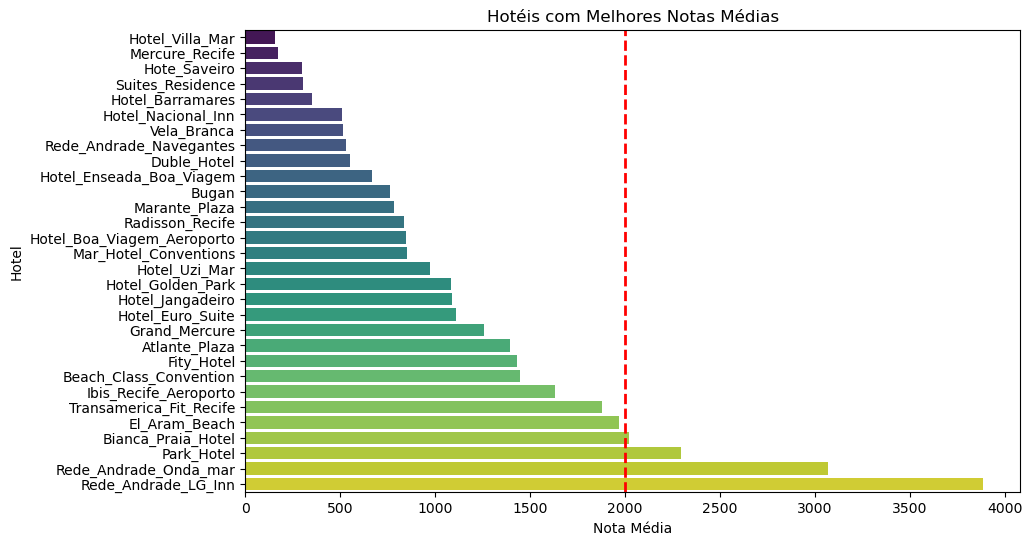

In [11]:
comentarios_positivos = data.groupby('hotel')['comentario_positivo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=comentarios_positivos, x='comentario_positivo', y='hotel', palette='viridis')

# Linha vertical vermelha, pontilhada, na posição x = 2000
# analise o fato de que poucos foram os hoteis que obtiveram mais de 2000 comentarios positivos
# e que a maioria dos hoteis tem menos de 2000 comentarios positivos

plt.axvline(x=2000, color='red', linestyle='--', linewidth=2)

plt.title('Hotéis com Melhores Notas Médias') # CORRIGIR O TITULO
plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.show()


# depois tente fazer uma correlaçõa entre QUANTIDADE DE COMENTARIOS e NOTA MEDIA para ver se existe 
# uma correlação entre o fato de ter uma nota média maior estimula mais comentários positivos



C:\Users\Itamar\AppData\Local\Temp\ipykernel_12996\2338566700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comentarios_negativos, x='comentario_negativo', y='hotel', palette='viridis')


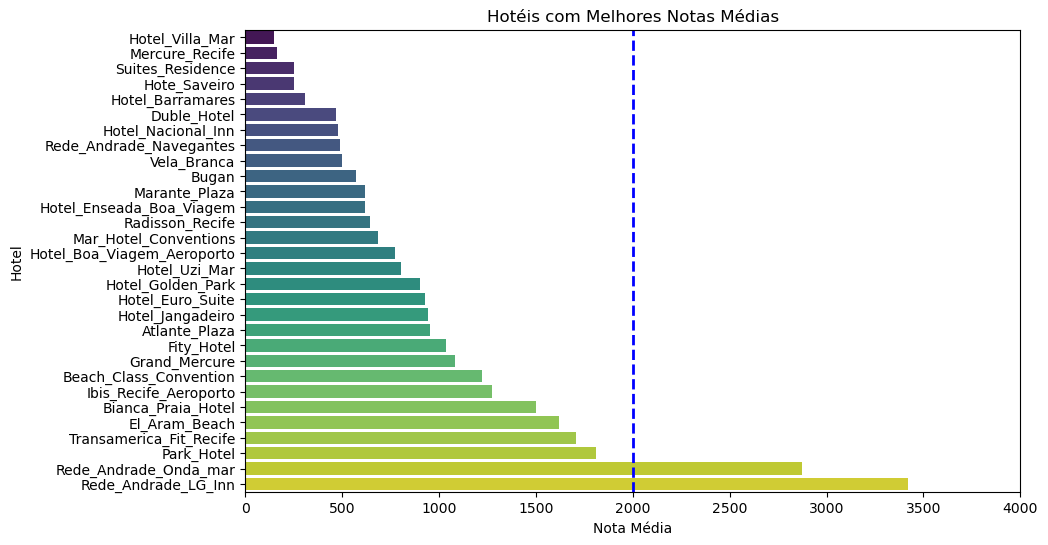

In [12]:
comentarios_negativos = data.groupby('hotel')['comentario_negativo'].count().sort_values().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=comentarios_negativos, x='comentario_negativo', y='hotel', palette='viridis')
plt.title('Hotéis com Melhores Notas Médias') # CORRIGIR O TITULO

plt.xlim(0, 4000)                             # Redefinindo o limite do eixo x
                                              # é importante para comparar com o gráfico anterior

plt.axvline(x=2000, color='blue', linestyle='--', linewidth=2)

plt.xlabel('Nota Média')
plt.ylabel('Hotel')
plt.show()


# Analisando esse gráfico vemos que os mesmos 2 hoteis que tiveram mais comentarios POSITIVOS também tiveram mais comentarios NEGATIVOS
# o que isso significa?

# Análise de Correlação:

- Pesquisar sobre o conceito de Correlação
- Enfatizar a Correlação de Pearson (que será usada aqui)
- e explicar como ela é usada para calcular a relação entre duas variáveis.

In [13]:
# Fazer o merge do df de "notas médias" com os de comentários positivos e negativos
# para ver se existe alguma correlação entre a quantidade de comentarios e a nota média

htl_nota_pos_neg = nota_media_hotel.merge(comentarios_positivos, on='hotel', how='left').merge(comentarios_negativos, on='hotel', how='left')
htl_nota_pos_neg

,hotel,nota_media,comentario_positivo,comentario_negativo
0,Hotel_Villa_Mar,6.619938,157,146
1,Vela_Branca,6.734131,517,497
2,Hotel_Boa_Viagem_Aeroporto,6.944288,847,772
3,Rede_Andrade_Onda_mar,7.054579,3066,2872
4,Rede_Andrade_Navegantes,7.160494,529,491
5,Hotel_Nacional_Inn,7.253390,507,477
6,Mercure_Recife,7.335211,170,163
7,Suites_Residence,7.506512,304,250
8,Hotel_Enseada_Boa_Viagem,7.510453,665,618
9,Hote_Saveiro,7.654206,299,252


## Nota Média Hotel x n de Comentários Positivos

In [18]:
# Cálculo da correlação de Pearson:

corr_pos, p_pos = pearsonr(htl_nota_pos_neg['nota_media'], htl_nota_pos_neg['comentario_positivo'])
corr_pos, p_pos

(0.22095103843731334, 0.24065687034697936)

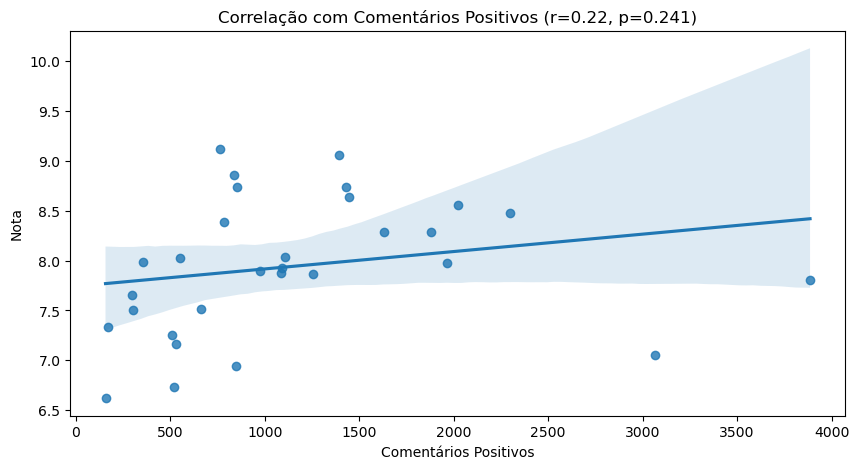

In [ ]:
# Visualização correlação entre nota média e quantidade de comentários POSITIVOS
plt.figure(figsize=(10, 5))
sns.regplot(x='comentario_positivo', y='nota_media', data=htl_nota_pos_neg)
plt.title(f'Correlação com Comentários Positivos (r={corr_pos:.2f}, p={p_pos:.3f})')
plt.xlabel('Comentários Positivos')
plt.ylabel('Nota')
plt.show()


Neste caso (correlação entre nota e número de comentários positivos) foram obtidos os seguintes resultados:
- Coeficiente de correlação (r) = 0.22
- Valor-p = 0.24

## Nota Média Hotel x n de Comentários Negativos

In [27]:
corr_neg, p_neg = pearsonr(htl_nota_pos_neg['nota_media'], htl_nota_pos_neg['comentario_negativo'])
corr_neg, p_neg


(0.1261151194773907, 0.5066462973608474)

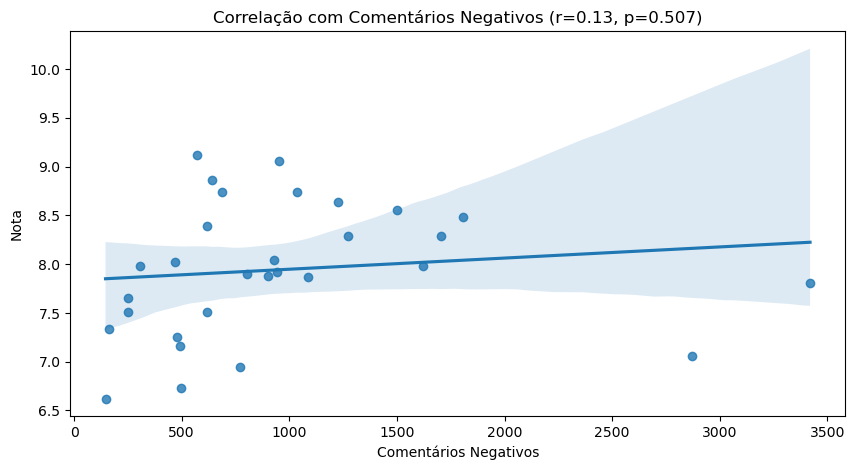

In [28]:
# Visualização da correlação entre nota média e quantidade de comentários NEGATIVOS
plt.figure(figsize=(10, 5))
sns.regplot(x='comentario_negativo', y='nota_media', data=htl_nota_pos_neg)
plt.title(f'Correlação com Comentários Negativos (r={corr_neg:.2f}, p={p_neg:.3f})')
plt.xlabel('Comentários Negativos')
plt.ylabel('Nota')
plt.show()

## conclusão sobre a análise de correlação:

Apesar de se observar uma leve tendência positiva, os resultados indicam que não há uma correlação estatisticamente significativa (p > 0,05) entre o número de comentários — positivos ou negativos — e a nota média dos hotéis. Portanto, não há evidências suficientes para afirmar que existe uma relação linear entre a nota média e o número de comentários positivos. Assim, com base nos dados analisados, não se pode concluir que hotéis com maiores notas médias tendem a receber um maior número de comentários positivos.

# ANOVA

A ANOVA de um fator permite verificar se a "média das notas" varia significativamente entre as "categorias" 

A ANOVA de um fator é uma técnica estatística que permite comparar as médias de três ou mais grupos para determinar se há diferenças significativas entre eles. Neste caso, estamos interessados em verificar se a `média das notas` dos hotéis (variável *dependente*) varia significativamente entre as diferentes `categorias` de hotéis (variável *independente*).

Assim, precisamos definir as categorias dos hoteis.

Pensei que podemos usar a categoria de **estrelas**.

Se vc entrar no Google e pesquisar o nome do hotel seguido de "boa viagem" vai aparecer no canto superior esquerdo uma foto do hotel e logo abaixo a categoria de estrelas.

Portanto, será preciso preencher outro arquivo com os nomes dos hoteis e suas respectivas categorias de estrelas.

## nota média hotel x categoria do hotel

In [30]:
# Fazer o merge do df de "notas médias" com o df que você vai criar com as categorias

nota_media_hotel

,hotel,nota_media
0,Hotel_Villa_Mar,6.619938
1,Vela_Branca,6.734131
2,Hotel_Boa_Viagem_Aeroporto,6.944288
3,Rede_Andrade_Onda_mar,7.054579
4,Rede_Andrade_Navegantes,7.160494
5,Hotel_Nacional_Inn,7.253390
6,Mercure_Recife,7.335211
7,Suites_Residence,7.506512
8,Hotel_Enseada_Boa_Viagem,7.510453
9,Hote_Saveiro,7.654206
